# Network Creation

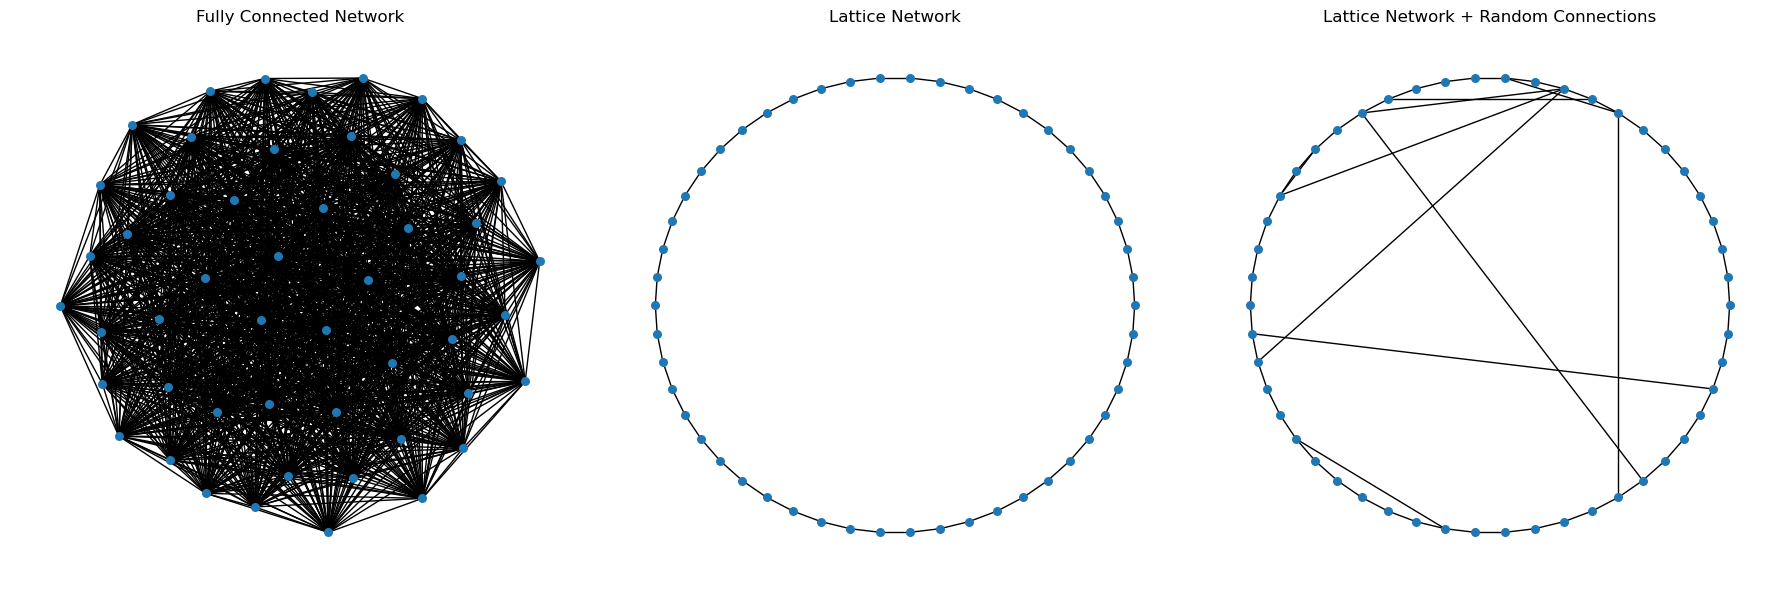

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# A. Fully connected network with 50 nodes
G1 = nx.complete_graph(50)

# B. Lattice network with 50 nodes, neighbourhood size 2
G2 = nx.watts_strogatz_graph(50, 2, 0)

# C. Lattice network + 10 random connections
G3 = nx.watts_strogatz_graph(50, 2, 0)
for _ in range(10):
    node1 = random.choice(list(G3.nodes()))
    node2 = random.choice(list(G3.nodes()))
    while G3.has_edge(node1, node2) or node1 == node2:
        node1 = random.choice(list(G3.nodes()))
        node2 = random.choice(list(G3.nodes()))
    G3.add_edge(node1, node2)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Fully connected network
nx.draw(G1, ax=axes[0], node_size=30, with_labels=False)
axes[0].set_title("Fully Connected Network")

# Lattice network
pos_ring = nx.circular_layout(G2)
nx.draw(G2, pos=pos_ring, ax=axes[1], node_size=30, with_labels=False)
axes[1].set_title("Lattice Network")

# Lattice + 10 random connections
pos_ring = nx.circular_layout(G3)
nx.draw(G3, ax=axes[2], pos=pos_ring, node_size=30, with_labels=False)
axes[2].set_title("Lattice Network + Random Connections")

plt.tight_layout()
plt.show()


# Naming Game

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import defaultdict
import matplotlib.animation as animation

class Agent:
    def __init__(self, id):
        self.id = id
        self.memory = []  # Each agent has 10 memory slots
        self.MAX_MEMORY = 10

    def create_new_name(self, existing_names):
        # Create a new name that doesn't exist in existing_names
        while True:
            new_name = f"word_{random.randint(1, 1000)}"
            if new_name not in existing_names:
                return new_name

    def add_to_memory(self, word):
        # Add a word to memory, remove the oldest if memory is full
        if len(self.memory) >= self.MAX_MEMORY:
            self.memory.pop(0)
        self.memory.append(word)

def naming_game(G, max_steps=100000, consensus_threshold=0.9):
    agents = {i: Agent(i) for i in G.nodes()}
    all_names = set()  # Set of all created names

    # Data storage for plotting
    steps = []
    consensus_counts = []
    total_memory_sizes = []

    for step in range(1, max_steps + 1):
        # Randomly select speaker
        speaker = random.choice(list(G.nodes()))
        if not list(G.neighbors(speaker)):  # If the node has no connections
            continue
        hearer = random.choice(list(G.neighbors(speaker)))

        speaker_agent = agents[speaker]
        hearer_agent = agents[hearer]

        # If speaker has no words, create a new one
        if not speaker_agent.memory:
            new_word = speaker_agent.create_new_name(all_names)
            speaker_agent.add_to_memory(new_word)
            all_names.add(new_word)

        # Speaker selects a random word from memory
        chosen_word = random.choice(speaker_agent.memory)

        # Update memories based on success or failure
        if chosen_word in hearer_agent.memory:
            # Success: keep only the chosen word
            speaker_agent.memory = [chosen_word]
            hearer_agent.memory = [chosen_word]
        else:
            # Failure: add the chosen word to hearer's memory
            hearer_agent.add_to_memory(chosen_word)

        # Collect data for plotting
        # Count the most frequent first memory word
        first_memory_words = [agent.memory[0] for agent in agents.values() if agent.memory]
        word_counts = defaultdict(int)
        for word in first_memory_words:
            word_counts[word] += 1
        if word_counts:
            most_common_word, count = max(word_counts.items(), key=lambda x: x[1])
        else:
            most_common_word, count = None, 0

        steps.append(step)
        consensus_counts.append(count)
        total_memory_sizes.append(sum(len(agent.memory) for agent in agents.values()))

        # Check for consensus
        if count / len(agents) >= consensus_threshold:
            print(f"Consensus reached at step {step} with word '{most_common_word}'.")
            break

    return agents, steps, consensus_counts, total_memory_sizes

def run_multiple_simulations(G, num_simulations=5, max_steps=100000, consensus_threshold=0.9):
    all_steps = []
    all_consensus = []
    all_total_memory = []
    
    for sim in range(num_simulations):
        print(f"Running simulation {sim + 1}/{num_simulations} for network {G.name}")
        agents, steps, consensus_counts, total_memory_sizes = naming_game(G, max_steps, consensus_threshold)
        all_steps.append(steps)
        all_consensus.append(consensus_counts)
        all_total_memory.append(total_memory_sizes)
    
    return all_steps, all_consensus, all_total_memory

# Create Networks
# A. Fully connected network with 50 nodes
G1 = nx.complete_graph(50)
G1.name = "Fully Connected Network"

# B. Lattice network with 50 nodes, neighbourhood size 2
G2 = nx.watts_strogatz_graph(50, 2, 0)
G2.name = "Lattice Network"

# C. Lattice network + 10 random connections
G3 = nx.watts_strogatz_graph(50, 2, 0)
for _ in range(10):
    node1 = random.choice(list(G3.nodes()))
    node2 = random.choice(list(G3.nodes()))
    while G3.has_edge(node1, node2) or node1 == node2:
        node1 = random.choice(list(G3.nodes()))
        node2 = random.choice(list(G3.nodes()))
    G3.add_edge(node1, node2)
G3.name = "Lattice Network + Random Connections"

# Define number of simulations
NUM_SIMULATIONS = 5

# Run simulations for each network type
results = {}
for G in [G1, G2, G3]:
    steps, consensus, total_memory = run_multiple_simulations(G, NUM_SIMULATIONS)
    results[G.name] = {
        'steps': steps,
        'consensus': consensus,
        'total_memory': total_memory
    }

# Function to compute average over simulations
def compute_average(data):
    min_length = min(len(run) for run in data)
    avg = []
    for i in range(min_length):
        step_sum = sum(run[i] for run in data)
        avg.append(step_sum / len(data))
    return avg, min_length

Running simulation 1/5 for network Fully Connected Network
Consensus reached at step 610 with word 'word_709'.
Running simulation 2/5 for network Fully Connected Network
Consensus reached at step 1058 with word 'word_574'.
Running simulation 3/5 for network Fully Connected Network
Consensus reached at step 663 with word 'word_88'.
Running simulation 4/5 for network Fully Connected Network
Consensus reached at step 927 with word 'word_522'.
Running simulation 5/5 for network Fully Connected Network
Consensus reached at step 1128 with word 'word_313'.
Running simulation 1/5 for network Lattice Network
Consensus reached at step 32799 with word 'word_494'.
Running simulation 2/5 for network Lattice Network
Consensus reached at step 28380 with word 'word_816'.
Running simulation 3/5 for network Lattice Network
Consensus reached at step 39211 with word 'word_153'.
Running simulation 4/5 for network Lattice Network
Consensus reached at step 37054 with word 'word_974'.
Running simulation 5/5 f

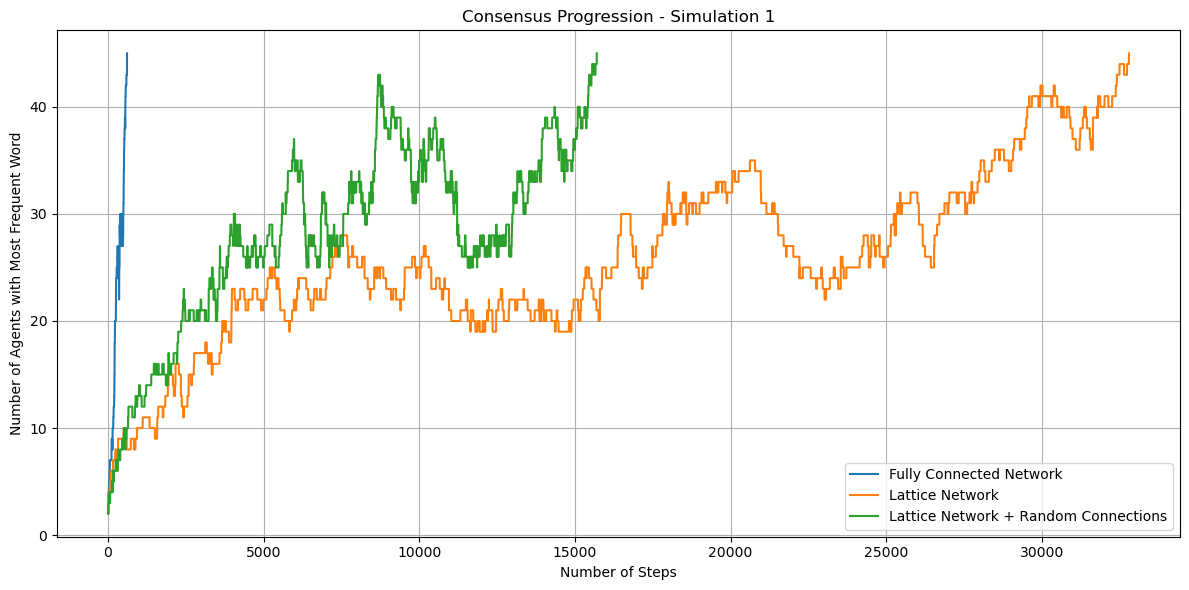

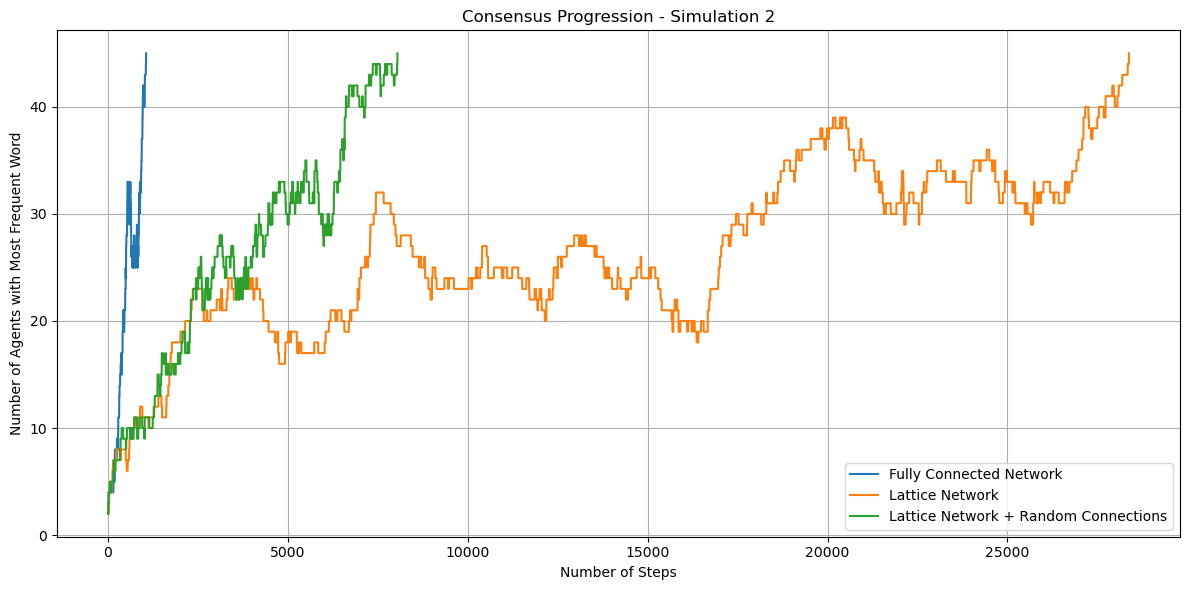

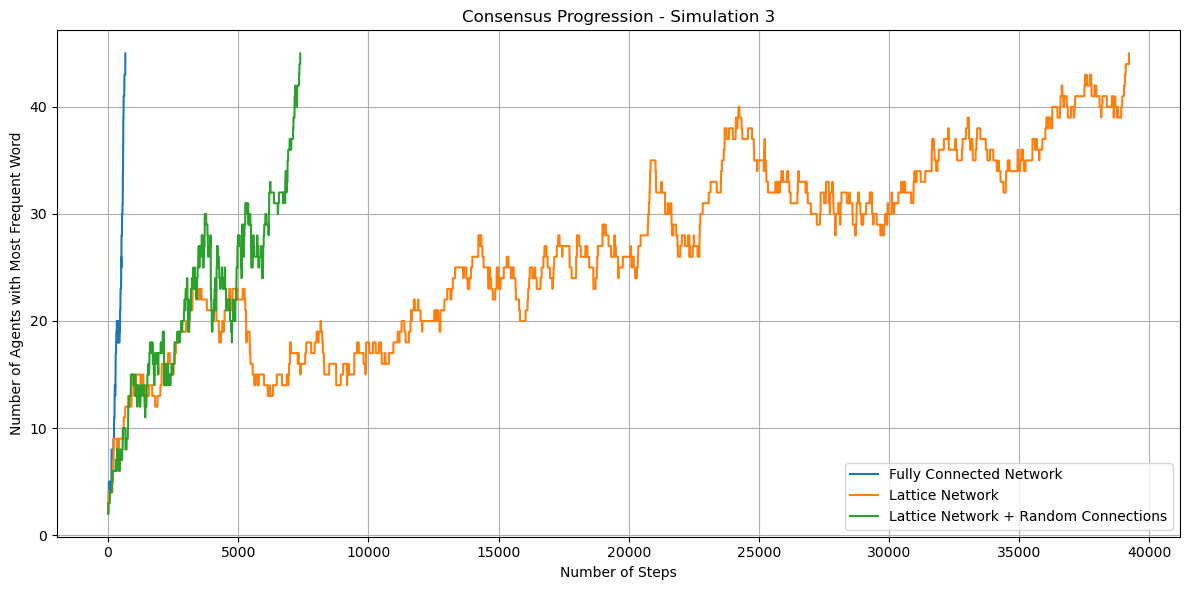

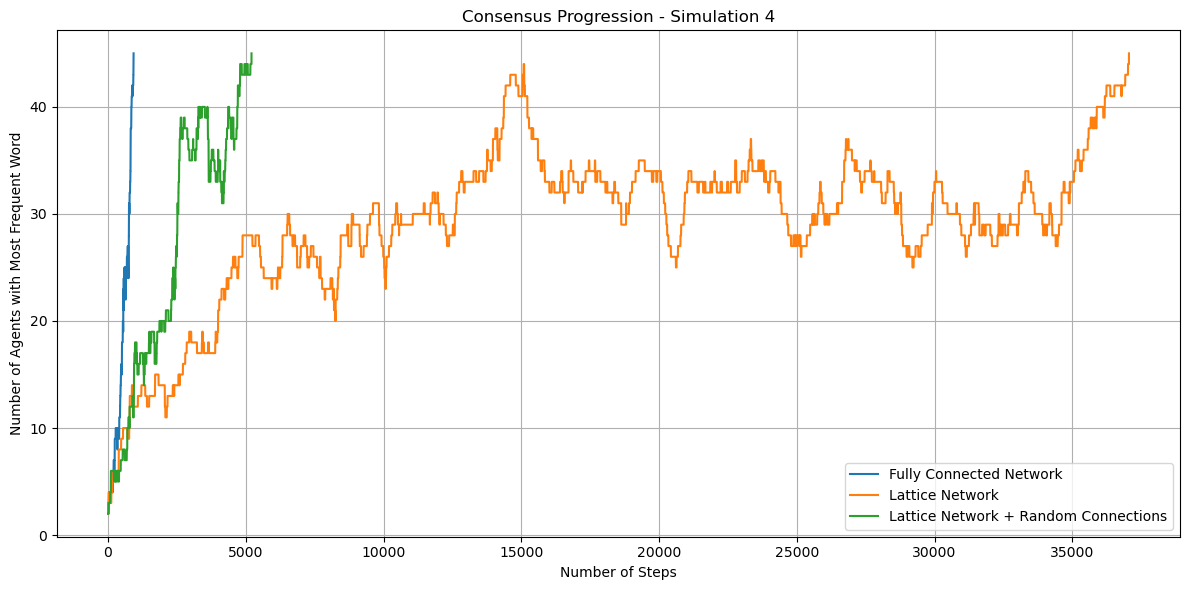

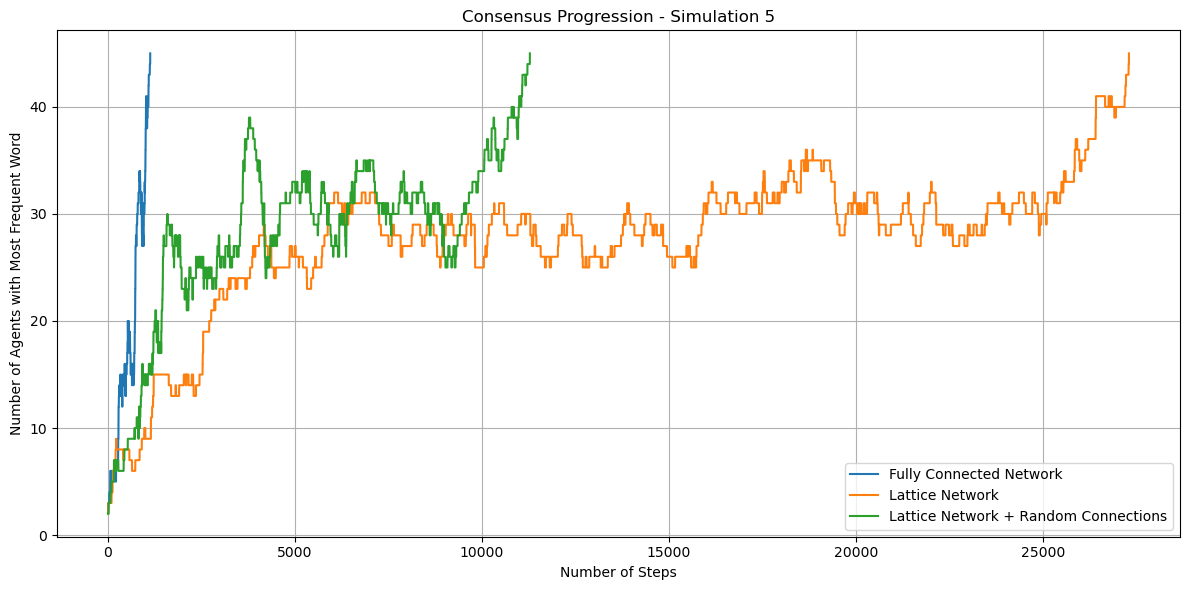

In [5]:
# Plot Combined Simulation Results
for sim in range(NUM_SIMULATIONS):
    plt.figure(figsize=(12, 6))
    for network, data in results.items():
        plt.plot(data['steps'][sim], data['consensus'][sim], label=f'{network}')
    plt.xlabel('Number of Steps')
    plt.ylabel('Number of Agents with Most Frequent Word')
    plt.title(f'Consensus Progression - Simulation {sim + 1}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


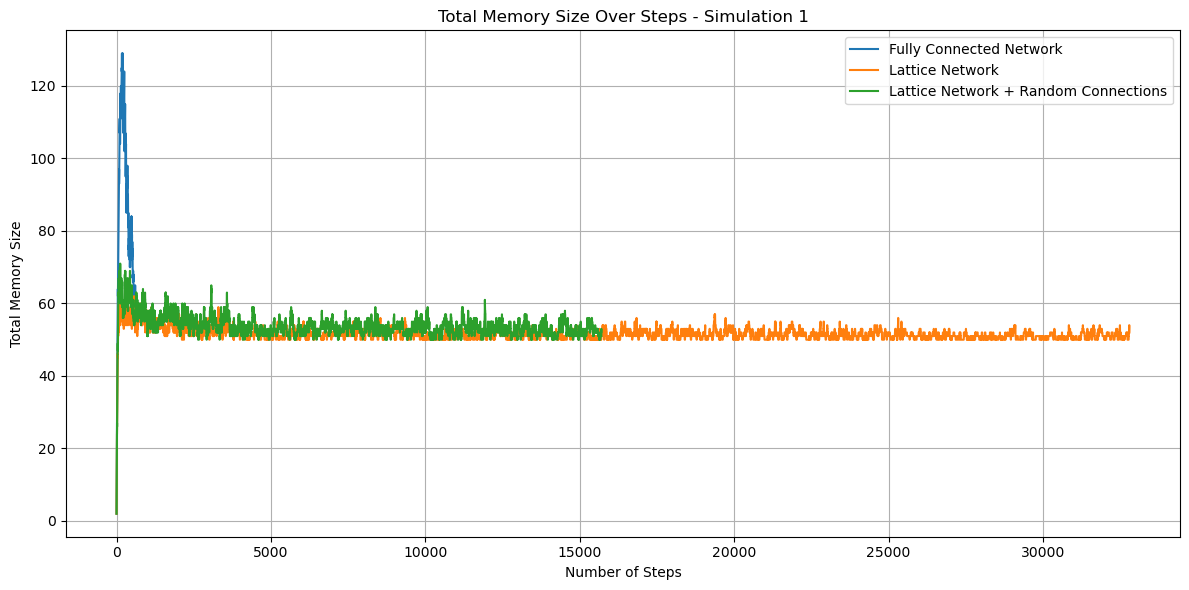

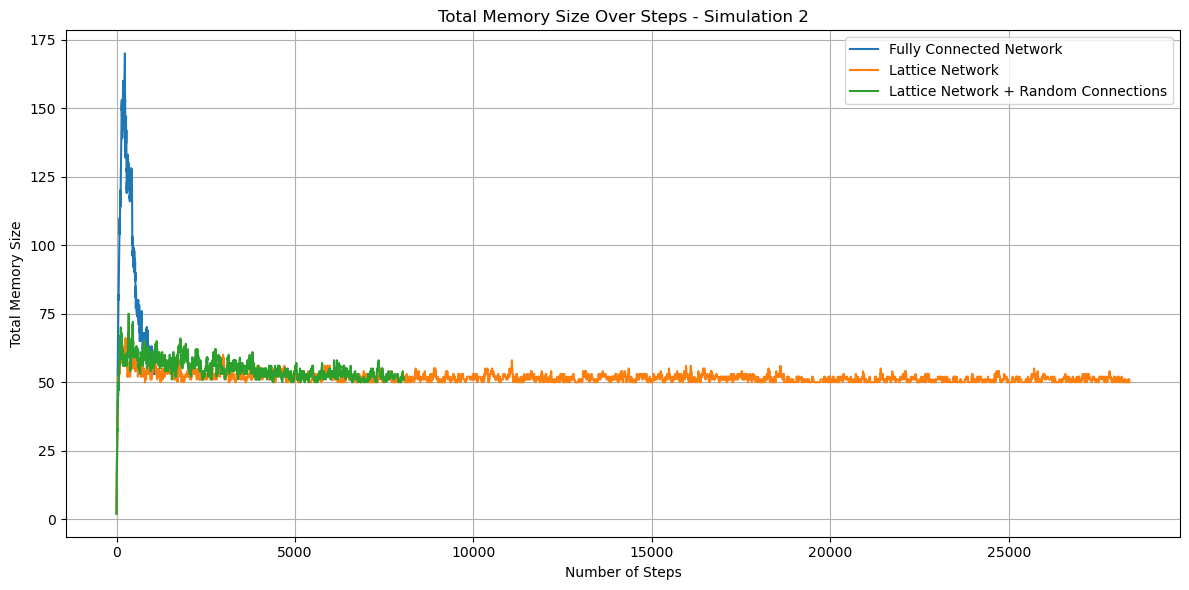

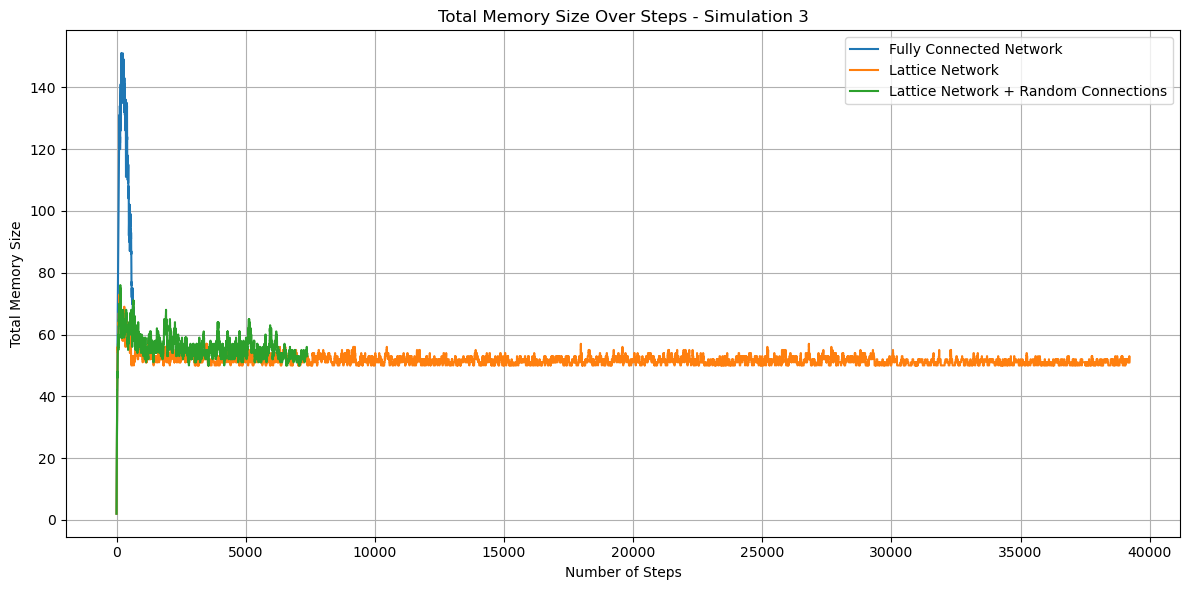

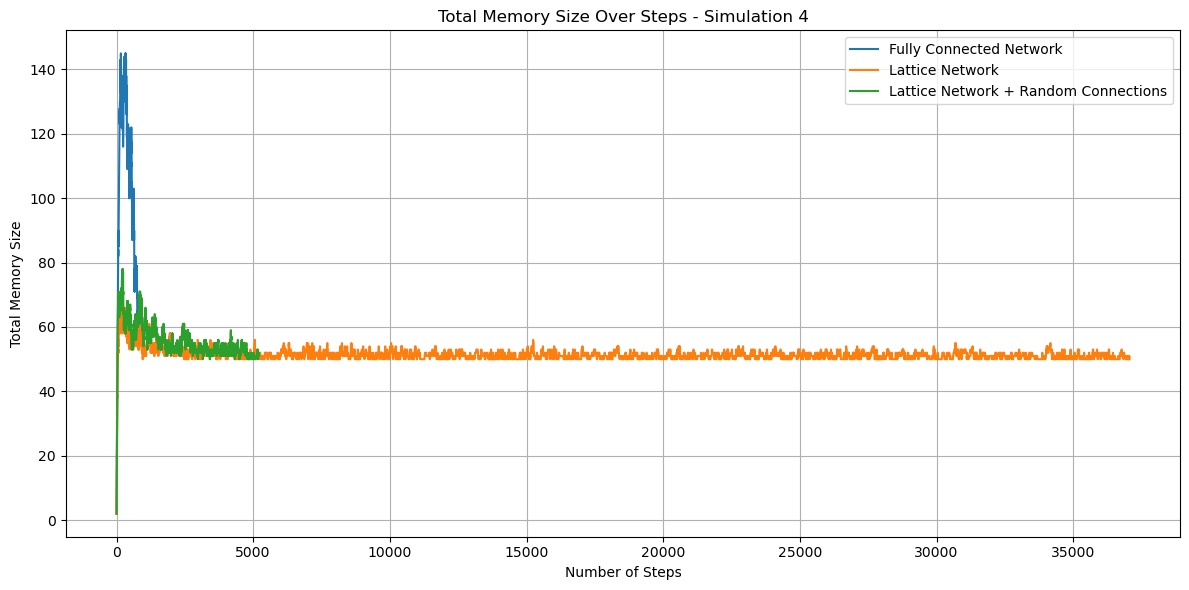

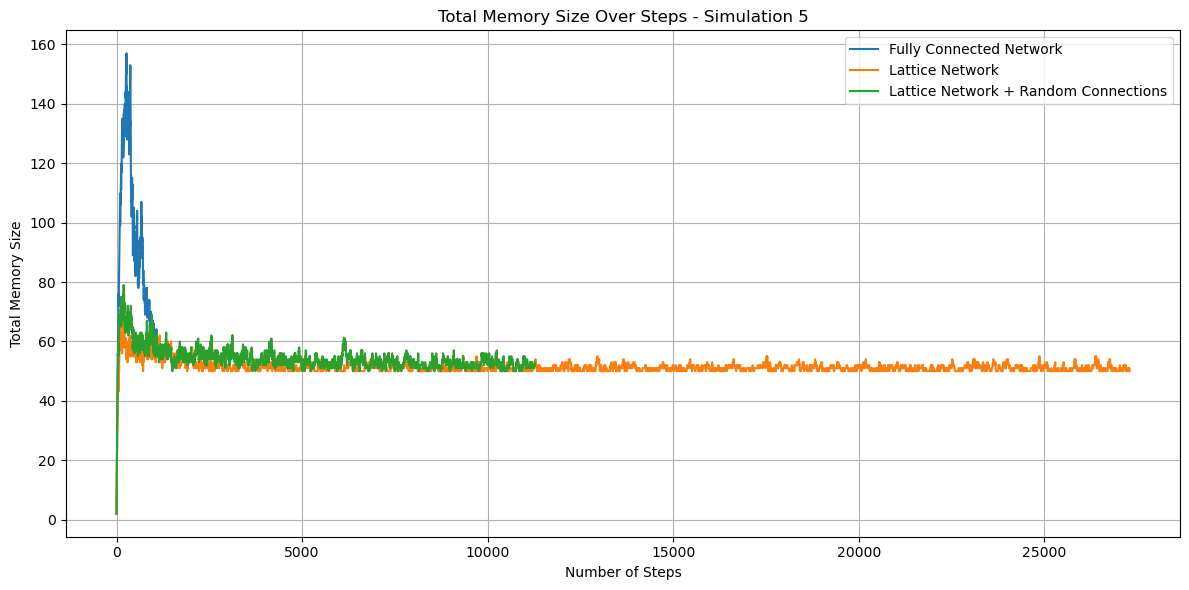

In [6]:
for sim in range(NUM_SIMULATIONS):
    plt.figure(figsize=(12, 6))
    for network, data in results.items():
        plt.plot(data['steps'][sim], data['total_memory'][sim], label=f'{network}')
    plt.xlabel('Number of Steps')
    plt.ylabel('Total Memory Size')
    plt.title(f'Total Memory Size Over Steps - Simulation {sim + 1}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()